# Embeddings 
Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation. Words or phrases from the vocabulary are mapped to vectors of real numbers. A key point is that embeddings keep context which we lose with bag-of-words vectorization.  **Visualize** using https://projector.tensorflow.org.


## Gensim
We will use the Gensim library to work with embeddings.  

In [1]:
#import libraries for examples
#!pip install gensim

import gensim
import gensim.downloader as api

import pprint

## Google Word2Vec
Word2Vec is based on the idea that we can learn about a word based on the words around it. Word2Vec finds relation (semantic or syntactic) between the words.  Word2Vec uses a shallow neural network.  You need to pass a large amount of text into the  Word2Vec model in order to figure out relation within words or generate meaningful results
![](images/NN2Vec-fully-connected-neural-network.png)

Source: http://mlwiki.org/index.php/Vector_Space_Models

### Word2Vec algorithms

There are 2 types of Algorithms : Continuous Bag of Words (CBOW) and Skip-gram.  


**CBOW** uses neighboring words as input to predict the target. 

![](images/cbow.png)

Source: https://medium.com/analytics-vidhya/word2vector-using-gensim-e055d35f1cb4

**Skip-gram** is the inverse of CBOW, where a target word is provided as input in order to predict the neighboring words.

![](images/skip-gram.png)

Source: https://medium.com/analytics-vidhya/word2vector-using-gensim-e055d35f1cb4


### NLTK Word2Vec Model

This is a smaller pre-trained model
- NLTK includes a pre-trained model which is part of a model that is trained on 100 billion words from the Google News Dataset.
- The full model is from https://code.google.com/p/word2vec/ (about 3 GB).
- To download the model  `nltk.download('word2vec_sample')`


In [2]:
import nltk
from nltk.data import find

word2vec_sample = str(find("models/word2vec_sample/pruned.word2vec.txt"))

model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)
print(len(model))
print(model.most_similar("car"))
print(model.most_similar(positive=["university"], topn = 3))

43981
[('vehicle', 0.7821094989776611), ('cars', 0.7423830032348633), ('truck', 0.6735790371894836), ('Car', 0.6677608489990234), ('Jeep', 0.6511332392692566), ('sedan', 0.6336701512336731), ('van', 0.6115671992301941), ('Mercedes', 0.6063581705093384), ('vehicles', 0.5998871326446533), ('automobile', 0.5838367938995361)]
[('universities', 0.7003918290138245), ('faculty', 0.6780907511711121), ('undergraduate', 0.6587096452713013)]


### Gensim Models

In [3]:
info = api.info()
pprint.pprint(list(info['models'].keys()))

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']


### Exploring word2vec pre-trained news vector


#### Load the desired model

Note: If you are receiving out of memory issues on your local machine, try closing other applications to free more memory on your device. You may want to try restarting your machine so that you can free up extra memory. Then immediately run the jupyter notebook and see if you can load the word vectors properly. 

In [4]:
w2v_model = api.load("word2vec-google-news-300")  # download the model and return as object ready for use

In [5]:
# Length of vocabulary 
length = len(w2v_model)
print(f"There are {length:,} unique words in the vocab")

There are 3,000,000 unique words in the vocab


In [6]:
# Few sample words (20) from the vocab
print(w2v_model.index_to_key[1000:1020])

['Paul', 'store', 'gets', 'filed', 'huge', 'moving', 'seems', 'met', '####s', 'thousands', 'CEO', 'solutions', 'score', 'content', 'treatment', 'offered', 'built', 'hits', 'present', 'Chicago']


In [7]:
# checking some of the multi-words withing first 2K embeddings
# '\w+(?:_\w+)+' regex looks for tokens with underscore(_) in them
import re

count=0
while count<2000:
    a = re.findall(r"\w+(?:_\w+)+",w2v_model.index_to_key[count])
    if not a:
        pass
    else:
        print(a)
    count+=1

['New_York']
['United_States']
['per_cent']
['Associated_Press']
['Los_Angeles']
['health_care']
['looking_statements']
['White_House']
['High_School']
['e_mail']
['vice_president']
['World_Cup']
['Web_site']
['chief_executive']
['New_Zealand']


In [8]:
#canonical examples
print(w2v_model.most_similar(positive=["woman","king"], negative=["man"], topn = 1))
print(w2v_model.most_similar(positive=["Paris","Germany"], negative=["Berlin"], topn = 1))

[('queen', 0.7118193507194519)]
[('France', 0.7884092926979065)]


In [9]:
#Obtain vectors for terms from the model
vec_car = w2v_model["car"]
print(vec_car)

[ 0.13085938  0.00842285  0.03344727 -0.05883789  0.04003906 -0.14257812
  0.04931641 -0.16894531  0.20898438  0.11962891  0.18066406 -0.25
 -0.10400391 -0.10742188 -0.01879883  0.05200195 -0.00216675  0.06445312
  0.14453125 -0.04541016  0.16113281 -0.01611328 -0.03088379  0.08447266
  0.16210938  0.04467773 -0.15527344  0.25390625  0.33984375  0.00756836
 -0.25585938 -0.01733398 -0.03295898  0.16308594 -0.12597656 -0.09912109
  0.16503906  0.06884766 -0.18945312  0.02832031 -0.0534668  -0.03063965
  0.11083984  0.24121094 -0.234375    0.12353516 -0.00294495  0.1484375
  0.33203125  0.05249023 -0.20019531  0.37695312  0.12255859  0.11425781
 -0.17675781  0.10009766  0.0030365   0.26757812  0.20117188  0.03710938
  0.11083984 -0.09814453 -0.3125      0.03515625  0.02832031  0.26171875
 -0.08642578 -0.02258301 -0.05834961 -0.00787354  0.11767578 -0.04296875
 -0.17285156  0.04394531 -0.23046875  0.1640625  -0.11474609 -0.06030273
  0.01196289 -0.24707031  0.32617188 -0.04492188 -0.114257

In [10]:
# Simmilarity
pairs = [
    ("car", "minivan"),   
    ("car", "bicycle"),  
    ("car", "airplane"),  
    ("car", "drone"), 
    ("car", "cereal"), 
    ("car", "communism")]

for w1, w2 in pairs:
    similarity = w2v_model.similarity(w1, w2)
    print(f"{w1} and {w2}     \tsimilarity score is\t{similarity:.3f}")

car and minivan     	similarity score is	0.691
car and bicycle     	similarity score is	0.536
car and airplane     	similarity score is	0.424
car and drone     	similarity score is	0.142
car and cereal     	similarity score is	0.139
car and communism     	similarity score is	0.058


In [11]:
#other words similar to car and minivan
pprint.pprint(w2v_model.most_similar(positive=["car", "minivan"], topn=10))

[('SUV', 0.8532191514968872),
 ('vehicle', 0.8175783753395081),
 ('pickup_truck', 0.7763689160346985),
 ('Jeep', 0.7567334175109863),
 ('Ford_Explorer', 0.7565719485282898),
 ('sedan', 0.7446292042732239),
 ('station_wagon', 0.7440938949584961),
 ('Honda_Civic', 0.7440058588981628),
 ('Nissan_Altima', 0.7391074895858765),
 ('Ford_Taurus', 0.7306575775146484)]


In [12]:
#doesn't match
print(w2v_model.doesnt_match(["fire", "water", "land", "sea", "air", "car"]))

car


In [13]:
# similarity score between sequence of words 
sim = w2v_model.n_similarity(["pizza", "store"], ["italian", "restaurant"])
print("{:.2f}".format(sim))

0.52


### Visualize the Model using T-SNE (T-distributed Stochastic Neighbor Embedding)

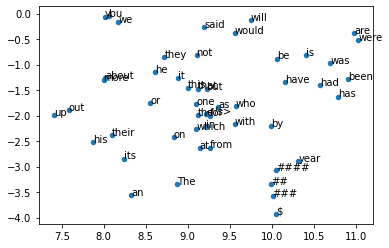

In [14]:
import numpy as np

labels = []
count = 0
max_count = 50
X = np.zeros(shape=(max_count,len(w2v_model["university"]))) 

for term in w2v_model.index_to_key:
    X[count] = w2v_model[term]
    labels.append(term)
    count+= 1
    if count >= max_count: break

from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_50 = pca.fit_transform(X)

from sklearn.manifold import TSNE
model_tsne = TSNE(n_components=2, learning_rate='auto', init="random", random_state=0)
Y = model_tsne.fit_transform(X_50)

# Show the scatter plot
import matplotlib.pyplot as plt
plt.scatter(Y[:,0], Y[:,1], 20)

# Add labels
for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 10)

plt.show()

### Creating your own embedding using a corpus

In [15]:
import pandas as pd
from nltk.corpus import inaugural


speeches = []
for fileid in inaugural.fileids():
    speeches.append((fileid, inaugural.raw(fileid)))

speeches_df = pd.DataFrame(speeches, columns=["filename","text"])
speeches_df.sample(10, random_state = 5)

,filename,text
31,1913-Wilson.txt,There has been a change of government. It bega...
42,1957-Eisenhower.txt,"The Price of Peace\nMr. Chairman, Mr. Vice Pre..."
34,1925-Coolidge.txt,"My countrymen,\n\nno one can contemplate curre..."
51,1993-Clinton.txt,"My fellow citizens, today we celebrate the mys..."
55,2009-Obama.txt,My fellow citizens:\n\nI stand here today humb...
19,1865-Lincoln.txt,Fellow-Countrymen:\n\nAt this second appearing...
43,1961-Kennedy.txt,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
26,1893-Cleveland.txt,"My Fellow citizens, in obedience of the mandat..."
23,1881-Garfield.txt,Fellow-Citizens:\n\nWe stand to-day upon an em...
28,1901-McKinley.txt,"My fellow-citizens, when we assembled here on ..."


In [16]:
#pre-processing

from nltk.tokenize import word_tokenize
import contractions

# expand contractions
speeches_df["text"] = speeches_df["text"].apply(lambda x: [contractions.fix(word) for word in x.split()])
#joining back the list of items into one string
speeches_df["text"] = [" ".join(map(str, l)) for l in speeches_df["text"]]

#cleaning
import regex as re
speeches_df["text"] = speeches_df["text"].str.lower()
speeches_df["text"] = speeches_df["text"].str.replace("-", " ")
speeches_df["text"] = speeches_df["text"].apply(lambda x: re.sub(r"[^\w\d\s\']+", "", x))

#tokenize
speeches_df['tokenized_text'] = speeches_df['text'].apply(word_tokenize)
speeches_df.sample(10, random_state = 5)

,filename,text,tokenized_text
31,1913-Wilson.txt,there has been a change of government it began...,"[there, has, been, a, change, of, government, ..."
42,1957-Eisenhower.txt,the price of peace mr chairman mr vice preside...,"[the, price, of, peace, mr, chairman, mr, vice..."
34,1925-Coolidge.txt,my countrymen no one can contemplate current c...,"[my, countrymen, no, one, can, contemplate, cu..."
51,1993-Clinton.txt,my fellow citizens today we celebrate the myst...,"[my, fellow, citizens, today, we, celebrate, t..."
55,2009-Obama.txt,my fellow citizens i stand here today humbled ...,"[my, fellow, citizens, i, stand, here, today, ..."
19,1865-Lincoln.txt,fellow countrymen at this second appearing to ...,"[fellow, countrymen, at, this, second, appeari..."
43,1961-Kennedy.txt,vice president johnson mr speaker mr chief jus...,"[vice, president, johnson, mr, speaker, mr, ch..."
26,1893-Cleveland.txt,my fellow citizens in obedience of the mandate...,"[my, fellow, citizens, in, obedience, of, the,..."
23,1881-Garfield.txt,fellow citizens we stand to day upon an eminen...,"[fellow, citizens, we, stand, to, day, upon, a..."
28,1901-McKinley.txt,my fellow citizens when we assembled here on t...,"[my, fellow, citizens, when, we, assembled, he..."


In [17]:
model = gensim.models.Word2Vec(speeches_df["tokenized_text"], # list of lists of tokens 
                              sg = 0, #either default CBOW(0) or skip gram(1)  
                              min_count=10, #word occurs at least 10 times
                              workers=4, # number of CPU Threads to use at once for faster training
                              vector_size=50, #number of Neurons to incorporate in hidden layer or size of Word Embeddings. By default its set to 100.
                              window=5, # window Size or Number of words to consider around target. If size = 1 then 1 word from both sides will be considered. By default 5 is fixed Window Size.
                              epochs = 10 ) #epoch : Number of Iterations / Epochs.
len(model.wv)

1525

In [18]:
#uncomment to view vocabulary
#model.wv.key_to_index

In [19]:
model.wv["country"] #50 weights

array([-0.38109052,  0.15353797, -0.16669784, -0.4001044 ,  0.92298275,
       -0.20303088, -0.01133722,  0.37126383, -0.11193936, -0.4270302 ,
        0.04508149, -1.0979168 ,  0.6390792 ,  0.8683005 ,  0.19704263,
       -0.09678717,  0.6985041 ,  0.6307319 , -0.08761152, -0.13924012,
       -0.23932305,  0.18957566,  0.16661516, -0.06946179,  0.3950278 ,
       -0.3074295 , -0.58250654, -0.5628133 , -0.27423066, -0.21373609,
        0.42617935, -0.7407715 ,  0.49923286, -0.6483552 , -0.8230391 ,
        0.32174787,  0.78899884,  0.09785467,  0.50987756, -0.4913256 ,
        0.36366016, -0.6418055 ,  0.02594528, -0.36465716, -0.07393324,
        0.84307635, -0.6148424 ,  0.20518555, -0.36862394,  0.72874   ],
      dtype=float32)

In [20]:
model.wv.most_similar("president")

[('vice', 0.9471983909606934),
 ('mr', 0.9363847374916077),
 ('chief', 0.9087536334991455),
 ('office', 0.8901432752609253),
 ('first', 0.8637455701828003),
 ('distinguished', 0.8496867418289185),
 ('senator', 0.8446415662765503),
 ('duties', 0.8404539227485657),
 ('execute', 0.831307053565979),
 ('discharge', 0.8266645669937134)]

In [21]:
model.wv.most_similar("state")

[('governments', 0.9615310430526733),
 ('foreign', 0.9613943696022034),
 ('powers', 0.9532686471939087),
 ('general', 0.9459452033042908),
 ('business', 0.9445802569389343),
 ('rights', 0.9430827498435974),
 ('interests', 0.9421287775039673),
 ('between', 0.9391429424285889),
 ('property', 0.9366445541381836),
 ('within', 0.9361602663993835)]

In [22]:
# compute the cosine similarity between 2 words
model.wv.similarity("state", "government") > 0.3

True

In [23]:
similar_words = {search_term: [item[0] for item in model.wv.most_similar([search_term], topn=5)]
                  for search_term in ["state", "president","government","election","justice"]}
pprint.pprint(similar_words)

{'election': ['elected', 'witness', 'earnest', 'address', 'immediate'],
 'government': ['law', 'power', 'union', 'general', 'federal'],
 'justice': ['property', 'protection', 'business', 'purposes', 'governments'],
 'president': ['vice', 'mr', 'chief', 'office', 'first'],
 'state': ['governments', 'foreign', 'powers', 'general', 'business']}


### Visualize

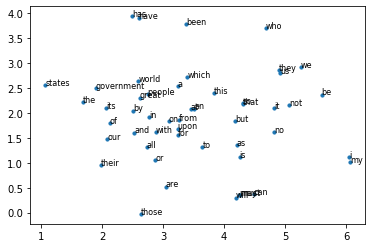

In [24]:
labels = []
count = 0
max_count = 50
X = np.zeros(shape=(max_count,len(model.wv["state"])))

for term in model.wv.index_to_key:
    X[count] = model.wv[term]
    labels.append(term)
    count+= 1
    if count >= max_count: break

pca = PCA(n_components=50)
X_50 = pca.fit_transform(X)

model_tsne = TSNE(n_components=2, learning_rate='auto', init="random", random_state=0)
Y = model_tsne.fit_transform(X_50)

plt.scatter(Y[:,0], Y[:,1], 10)

for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = (0, 0), textcoords = 'offset points', size = 8)

plt.show()

### Save

In [25]:
model.save("speeches.embedding")

### Reload and use

In [26]:
new_model = gensim.models.Word2Vec.load("speeches.embedding")

print(len(new_model.wv["honest"]))

print(new_model.wv.most_similar("honest", topn=10))

# to compute the cosine similarity between 2 words
print(new_model.wv.similarity("president", "honest") > 0.7)

50
[('necessity', 0.977342426776886), ('equally', 0.9766798615455627), ('effort', 0.9758232831954956), ('guaranty', 0.9758111238479614), ('private', 0.9740320444107056), ('peaceful', 0.9730589389801025), ('acknowledged', 0.9725711941719055), ('promote', 0.9725164175033569), ('equality', 0.9721078276634216), ('concerns', 0.9712231755256653)]
False


## Stanford GloVE (Global Vectors)
As it's name states, GloVE is about global context.  

The basic methodology of the GloVe model is to first create a huge word-context co-occurence matrix consisting of (word, context) pairs such that each element in this matrix represents how often a word occurs with the context (which can be a sequence of words). GloVe starts with global aggregated co-occurrence statistics across all words in the corpus while Word2Vec starts with local individual examples of word co-occurrence pairs.


![](images/glove.png)

source: https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-glove.html

### Using Gensim GloVE Twitter model

In [27]:
glove_model = api.load("glove-twitter-200")  # download the model and return as object ready for use
glove_model.most_similar("car")

[('truck', 0.7657955288887024),
 ('cars', 0.7584866881370544),
 ('driving', 0.7157721519470215),
 ('drive', 0.6923045516014099),
 ('front', 0.6751189231872559),
 ('vehicle', 0.6674408912658691),
 ('bus', 0.6626533269882202),
 ('bike', 0.655992329120636),
 ('cause', 0.6432175636291504),
 ('house', 0.6365078687667847)]

In [28]:
glove_model.most_similar(negative="car")

[('uynnyulrtyulr', 0.40962669253349304),
 ('الليال', 0.39943578839302063),
 ('jgtseuyt', 0.39722755551338196),
 ('わからない曲があります', 0.39374586939811707),
 ('歳なのに雑誌を真剣に', 0.3903217315673828),
 ('友達に言われたんだけどakb', 0.3895500898361206),
 ('出現中の魔女', 0.3863939940929413),
 ('離乳食をモグモグ', 0.3848898708820343),
 ('동디더', 0.3827054798603058),
 ('会員無料の情報サイト', 0.37759968638420105)]

In [29]:
def analogy(x1, x2, y1):
    result = glove_model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [30]:
analogy("japan", "japanese", "brazil")

'brazilian'

In [31]:
analogy("germany", "beer", "france")

'wine'

In [32]:
analogy("obama", "barack", "trump")

'donald'

In [33]:
countries = [ "canada", "italy", "ireland", "india"]
foods = [analogy('us', 'hamburger', country) for country in countries]
country_food = zip(countries,foods)
print((pd.DataFrame(country_food)))

         0             1
0   canada       poutine
1    italy       bologna
2  ireland  cheeseburger
3    india        hotdog


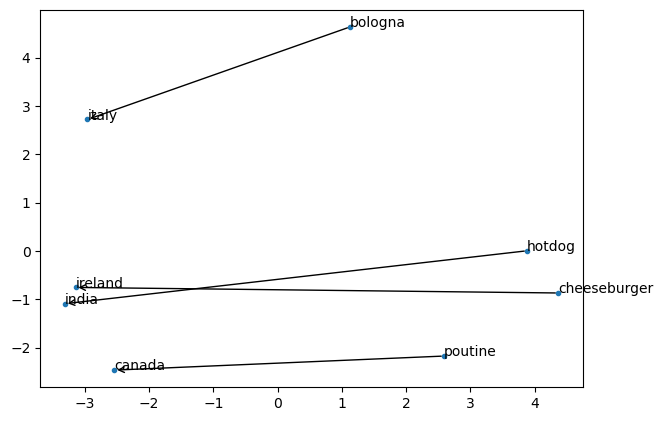

In [34]:
def plot_data(orig_data, labels):
    pca = PCA(n_components=2)
    data = pca.fit_transform(orig_data)
    plt.figure(figsize=(7, 5), dpi=100)
    plt.plot(data[:,0], data[:,1], '.')
    for i in range(len(data)):
        plt.annotate(labels[i], xy = data[i])
    for i in range(len(data)//2):
        plt.annotate("",
                xy=data[i],
                xytext=data[i+len(data)//2],
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3")
        )
       
labels = countries + foods
data = [glove_model[w] for w in labels]
plot_data(data, labels)